### **Aim of project is to investigate potential bias in Fandango's movie ratings in 2015 to determine if there was a tendency to rate movies higher to boost ticket sales.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.isnull().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

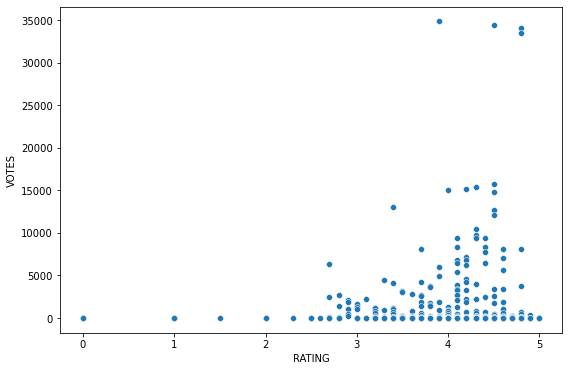

In [6]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a year column**

In [8]:
title = 'Film Titile Name(Year)'

title.split('(')[-1].replace(')','')

'Year'

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

In [11]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Creating a dataFrame of only reviewed films by removing any films that have zero votes**

In [12]:
(fandango['VOTES'] == 0).sum()

69

In [13]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [14]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [15]:
fan_reviewed[fan_reviewed['VOTES']==0]

,FILM,STARS,RATING,VOTES,YEAR


**Creating a new column for the discrepancy between STARS displayed versus true RATING.**

In [16]:
fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

<ipython-input-16-b42da8a59abe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING']
<ipython-input-16-b42da8a59abe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [17]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [18]:
fan_reviewed['STARS_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

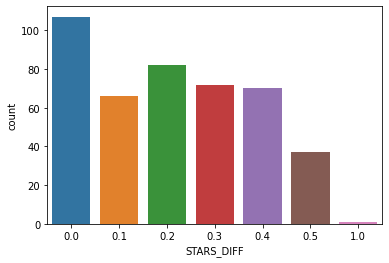

In [19]:
sns.countplot(data=fan_reviewed, x='STARS_DIFF')

**finding out which movie had a star differene of 1**

In [20]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### comparing the scores from Fandango to other movies sites to see how they compare.

In [21]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [23]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


**Visualizing the relationship between critic reviews and user reviews**

<AxesSubplot:xlabel='Metacritic_Critic', ylabel='Metacritic_User'>

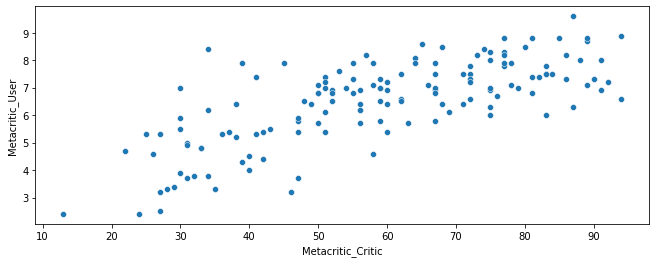

In [24]:
plt.figure(figsize=(11,4))
plt.xlabel('Metacritic_Critic')
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

<AxesSubplot:xlabel='Rotten Tomatoes_Critic', ylabel='RottenTomatoes_User'>

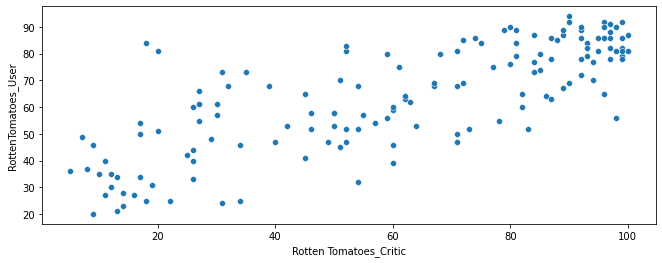

In [25]:
plt.figure(figsize=(11,4))
plt.xlabel('Rotten Tomatoes_Critic')
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

**Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table so we use inner join**

In [26]:
df = pd.merge(fandango,all_sites,how='inner', on='FILM')

In [27]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 14.7+ KB


### Normalizing all ratings to a scale of 5

In [29]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Name: max, dtype: float64

In [30]:
df['RottenTomatoes_Norm'] = np.round(df['RottenTomatoes']/20,1)

In [31]:
df['RottenTomatoes_U_Norm'] = np.round(df['RottenTomatoes_User']/20,1) 

In [32]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)

In [33]:
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1) 

In [34]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1) 

In [35]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RottenTomatoes_Norm                5.0
RottenTomatoes_U_Norm              4.7
Meta_Norm                          4.7
Meta_U_Norm                        4.8
IMDB_Norm                          4.3
Name: max, dtype: float64

In [36]:
normalized_scores = df[['FILM','STARS','RATING','RottenTomatoes_Norm','RottenTomatoes_U_Norm','Meta_Norm',
                        'Meta_U_Norm','IMDB_Norm']]

In [37]:
normalized_scores

,FILM,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


**Comparing the distributions of normalized ratings**

<AxesSubplot:ylabel='Density'>

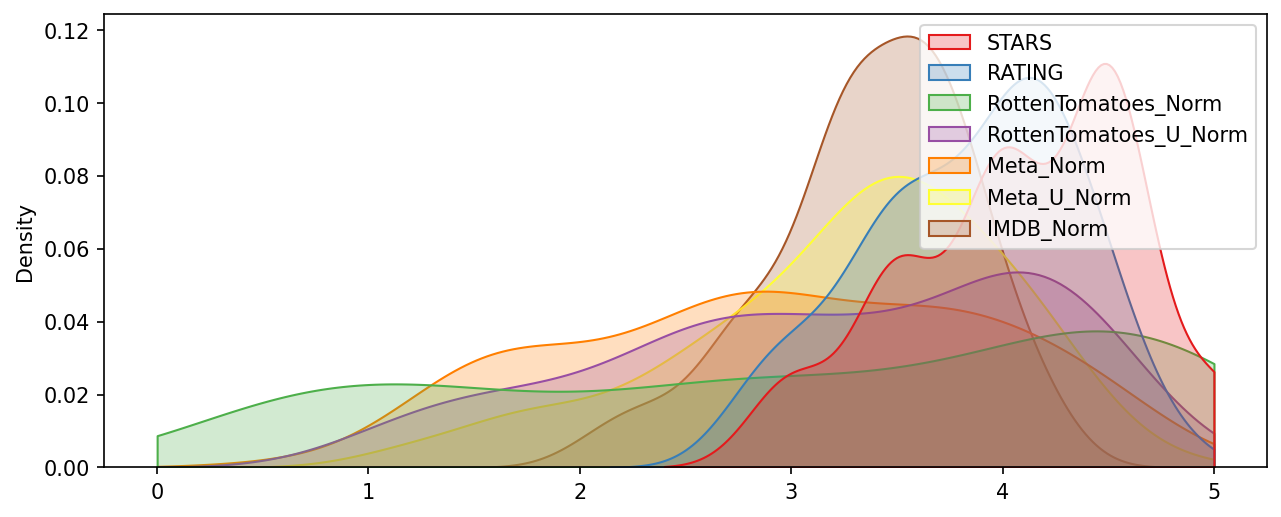

In [38]:
plt.figure(dpi=150,figsize=(10,4))
sns.kdeplot(data=normalized_scores,shade=True,clip=[0,5],palette='Set1')

<AxesSubplot:ylabel='Density'>

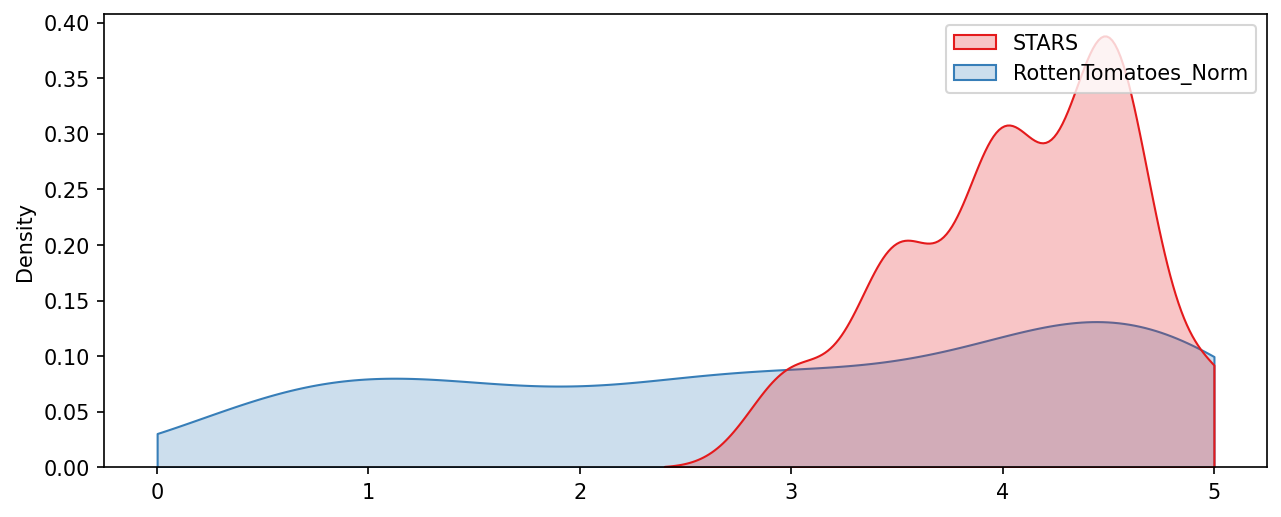

In [39]:
plt.figure(dpi=150,figsize=(10,4))
sns.kdeplot(data=normalized_scores[['STARS','RottenTomatoes_Norm']],shade=True,clip=[0,5],palette='Set1')

<AxesSubplot:ylabel='Count'>

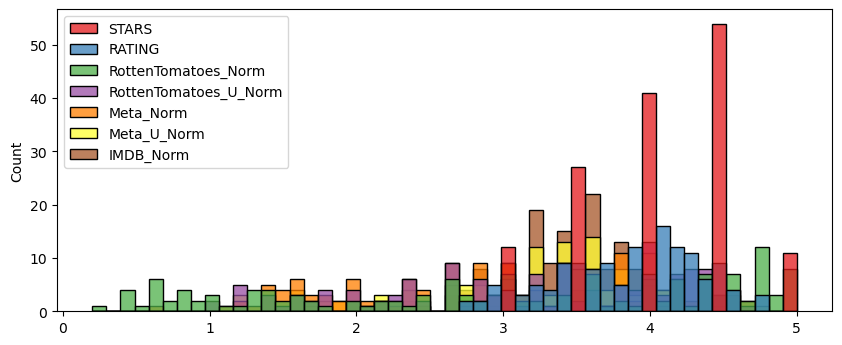

In [40]:
plt.figure(dpi=100,figsize=(10,4))
sns.histplot(data=normalized_scores,palette='Set1',bins=50)

**Clearly Fandango has an uneven distribution. Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating**

**Examining the worst 10 films and their ratings**

In [41]:
worst_films=normalized_scores.nsmallest(10,'RottenTomatoes_Norm')
worst_films

,FILM,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


<AxesSubplot:ylabel='Density'>

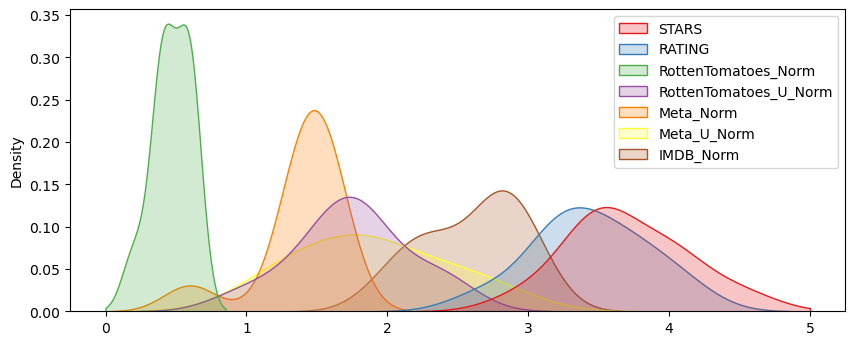

In [42]:
plt.figure(dpi=100,figsize=(10,4))
sns.kdeplot(data=worst_films,shade=True,clip=[0,5],palette='Set1')

**Fandango gives even the worst rated films about 4 stars**

In [43]:
worst_films.nsmallest(2,'Meta_Norm')

,FILM,STARS,RATING,RottenTomatoes_Norm,RottenTomatoes_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0


### Conclusion: There is a bias in Fandango's movie ratings and a tendency to rate movies higher to boost ticket sales 